<a href="https://colab.research.google.com/github/Anand09kd/Real-time-Dog-vs-Cat_prediction/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importants Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [2]:
## Generators for training and validation
trains_ds = keras.utils.image_dataset_from_directory(
    directory = "drive/MyDrive/Cats-vs-Dogs/train",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "drive/MyDrive/Cats-vs-Dogs/test",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
# Normalie
def process (image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

trains_ds = trains_ds.map(process)
validation_ds = validation_ds.map(process)

## Create CNN model

In [4]:
model = Sequential()

# 32
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# 64
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

#128
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(trains_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1548s 2s/step - accuracy: 0.5734 - loss: 2.2146 - val_accuracy: 0.5890 - val_loss: 0.6643
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 169ms/step - accuracy: 0.7007 - loss: 0.5905 - val_accuracy: 0.7256 - val_loss: 0.5400
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 167ms/step - accuracy: 0.7783 - loss: 0.4734 - val_accuracy: 0.7762 - val_loss: 0.5537
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 164ms/step - accuracy: 0.8035 - loss: 0.4313 - val_accuracy: 0.8012 - val_loss: 0.4535
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 164ms/step - accuracy: 0.8395 - loss: 0.3576 - val_accuracy: 0.6448 - val_loss: 1.0859
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 171ms/step - accuracy: 0.8794 - loss: 0.2830 - val_accuracy: 0.7328 - val_loss: 0.7053
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 165ms/step - accuracy: 0.9079 - loss: 0.2280 - val_accuracy: 0.7866 - val_loss: 0.5986
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.9361 - l

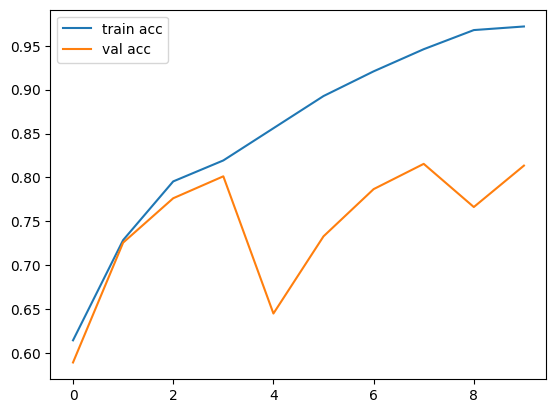

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

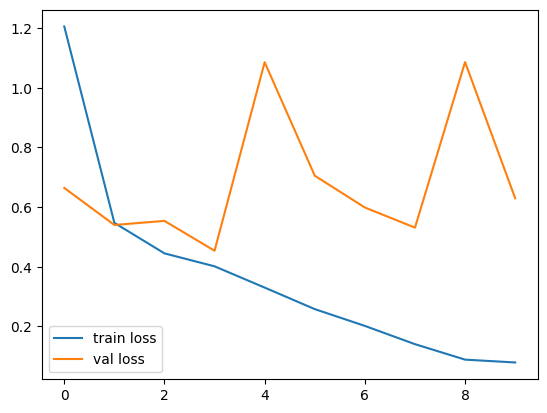

In [9]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [10]:
import cv2

## Results

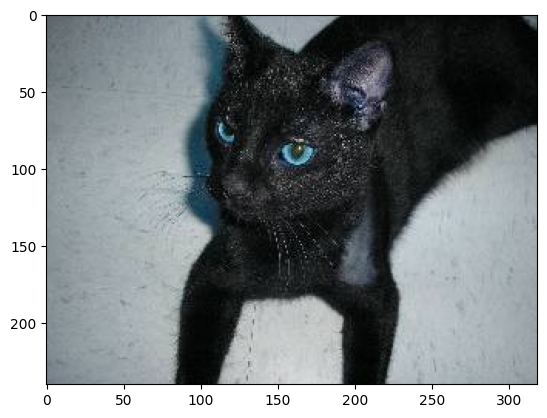

In [11]:
# For Cat
test_img = cv2.imread("drive/MyDrive/Cats-vs-Dogs/cat.962.jpg")
plt.imshow(test_img)

In [12]:
test_img.shape

(240, 319, 3)

In [13]:
test_img = cv2.resize(test_img, (256, 256))

In [14]:
test_input = test_img.reshape((1, 256, 256, 3))

In [15]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

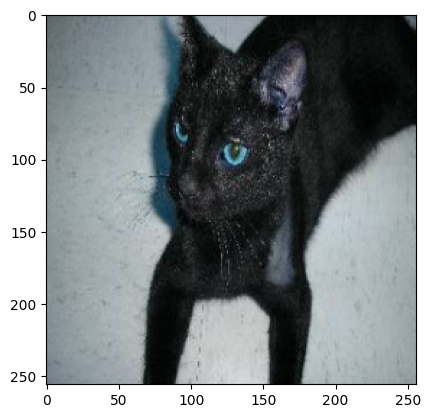

In [16]:
# For Dog
test_dog_img = cv2.imread("drive/MyDrive/Cats-vs-Dogs/dog.950.jpg")
plt.imshow(test_img)

In [17]:
test_dog_img.shape

(286, 430, 3)

In [18]:
test_dog_img = cv2.resize(test_img, (256, 256))

In [19]:
test_input = test_dog_img.reshape((1, 256, 256, 3))

In [20]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[1.]], dtype=float32)

In [21]:
model.save("cat_dog_classifier.keras")